In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
!ls "/content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/"

'Melanoma Detection.ipynb'   Test   Train


In [19]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from glob import glob

In [20]:
# Load train and test data
data_dir_train = pathlib.Path("/content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Test")

In [21]:
# Get train and test data size
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [22]:
# Set paramaters
batch_size = 32
img_height = 180
img_width = 180

In [23]:
image_size = (img_width, img_height)

In [24]:
# Create train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [25]:
# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [26]:
# List class names
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)
print(num_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


In [27]:
# Checking image size and batch size
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


actinic keratosis
basal cell carcinoma
dermatofibroma
melanoma
nevus
pigmented benign keratosis
seborrheic keratosis
squamous cell carcinoma
vascular lesion


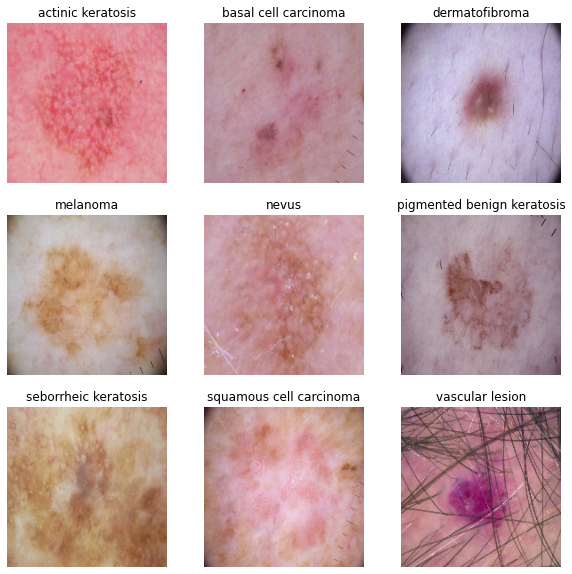

In [29]:
# Plot one image from each class from train dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        print(class_names[label.numpy()[0]])
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

In [30]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [72]:
# Build model
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [73]:
# Compile model by selecting optimizer, loss function and metrics to compute
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [74]:
# View the summary of all layers
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [75]:
# Fit the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 29ms/step - loss: 2.2172 - accuracy: 0.2076 - val_loss: 2.0611 - val_accuracy: 0.2013
Epoch 2/20
56/56 [==============================] - 1s 26ms/step - loss: 1.8489 - accuracy: 0.3320 - val_loss: 1.8626 - val_accuracy: 0.2729
Epoch 3/20
56/56 [==============================] - 1s 26ms/step - loss: 1.6705 - accuracy: 0.4113 - val_loss: 1.6459 - val_accuracy: 0.4609
Epoch 4/20
56/56 [==============================] - 1s 26ms/step - loss: 1.5354 - accuracy: 0.4581 - val_loss: 1.5314 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 1s 26ms/step - loss: 1.4639 - accuracy: 0.4927 - val_loss: 1.5625 - val_accuracy: 0.4720
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 1.3973 - accuracy: 0.5218 - val_loss: 1.4493 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 1s 25ms/step - loss: 1.3195 - accuracy: 0.5329 - val_loss: 1.4245 - val_accuracy: 0.5168
Epoch 8/20
56

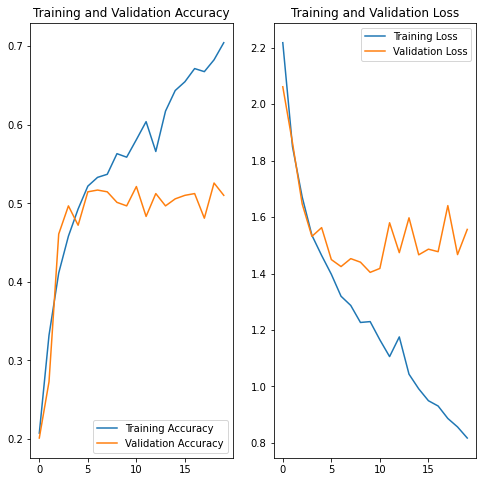

In [76]:
# Visualize the result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

* There is considerable difference in training and validation accuracy, that means model is overfitting.
* We have already used dropout strategy to avoid it.
* Other technique is data augmentation - Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [77]:
# Build aumentation strategy
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.3)
  ]
)

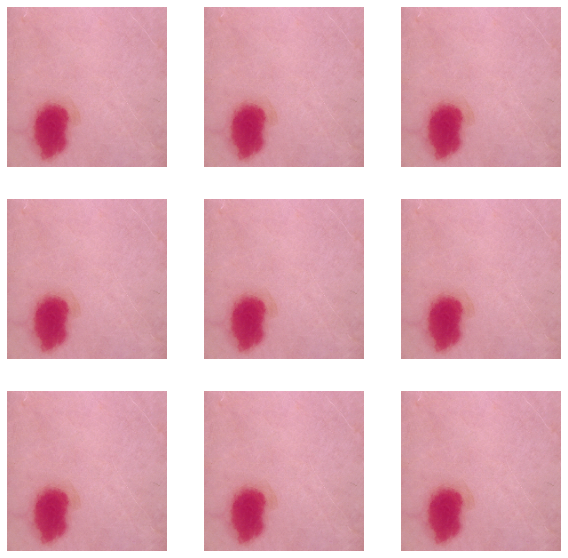

In [78]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [79]:
# Build model including augmentation strategy
model_1 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [80]:
# Compile the model
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
model_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 90, 90, 32)        4640      
                                                     

In [82]:
epochs = 20
history = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 32ms/step - loss: 2.5198 - accuracy: 0.1959 - val_loss: 2.0896 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 2s 29ms/step - loss: 2.0242 - accuracy: 0.2104 - val_loss: 2.0944 - val_accuracy: 0.2595
Epoch 3/20
56/56 [==============================] - 2s 29ms/step - loss: 1.9184 - accuracy: 0.3052 - val_loss: 1.9428 - val_accuracy: 0.3624
Epoch 4/20
56/56 [==============================] - 2s 29ms/step - loss: 1.6947 - accuracy: 0.3934 - val_loss: 1.7352 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 2s 29ms/step - loss: 1.5611 - accuracy: 0.4330 - val_loss: 1.7051 - val_accuracy: 0.3848
Epoch 6/20
56/56 [==============================] - 2s 29ms/step - loss: 1.5117 - accuracy: 0.4609 - val_loss: 1.6363 - val_accuracy: 0.4631
Epoch 7/20
56/56 [==============================] - 2s 29ms/step - loss: 1.4678 - accuracy: 0.4665 - val_loss: 1.5153 - val_accuracy: 0.4743
Epoch 8/20
56

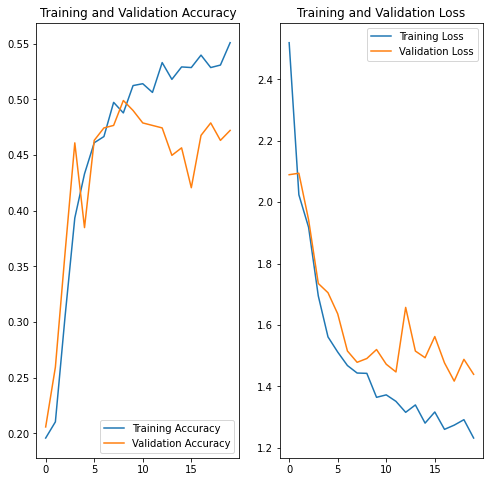

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

* Difference in training and validation accuracy reduced but overall accuracy reduced considerably.

In [84]:
# Check distribution of images in train dataset
path_list_train = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_train = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_train = dict(zip(path_list_train, lesion_list_train))
df_train = pd.DataFrame(list(dataframe_dict_train.items()),columns = ['Path','Label'])
df_train['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

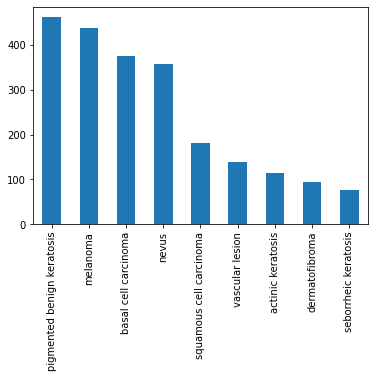

In [85]:
df_train['Label'].value_counts().plot.bar()

* In training dataset, 'pigmented benign keratosis' class have maximum number of images = 462, where as 'seborrheic keratosis' have only 77 images
* So this is class imbalance problem.

In [86]:
# Image distribution in training dataset
label_count = {}
for image_batch, labels_batch in train_ds:
  for label in labels_batch:
    if label.numpy() in label_count:
      label_count[label.numpy()] = label_count[label.numpy()] + 1
    else:
      label_count[label.numpy()] = 1
print(label_count)

count = {}
for key, value in label_count.items():
  count[class_names[key]] = value
print(count)


{4: 277, 5: 370, 8: 115, 3: 352, 0: 92, 1: 309, 7: 142, 6: 58, 2: 77}
{'nevus': 277, 'pigmented benign keratosis': 370, 'vascular lesion': 115, 'melanoma': 352, 'actinic keratosis': 92, 'basal cell carcinoma': 309, 'squamous cell carcinoma': 142, 'seborrheic keratosis': 58, 'dermatofibroma': 77}


In [87]:
# Image distribution in validation dataset
label_count = {}
for image_batch, labels_batch in val_ds:
  for label in labels_batch:
    if label.numpy() in label_count:
      label_count[label.numpy()] = label_count[label.numpy()] + 1
    else:
      label_count[label.numpy()] = 1
print(label_count)

count = {}
for key, value in label_count.items():
  count[class_names[key]] = value
print(count)


{8: 24, 4: 80, 2: 18, 1: 67, 7: 39, 5: 92, 3: 86, 6: 19, 0: 22}
{'vascular lesion': 24, 'nevus': 80, 'dermatofibroma': 18, 'basal cell carcinoma': 67, 'squamous cell carcinoma': 39, 'pigmented benign keratosis': 92, 'melanoma': 86, 'seborrheic keratosis': 19, 'actinic keratosis': 22}


In [88]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
path_to_training_dataset="/content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Train/"

In [90]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCB7E0AD490>: 100%|██████████| 500/500 [00:20<00:00, 23.97 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCBFAA6A150>: 100%|██████████| 500/500 [00:21<00:00, 23.32 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCB7E0BDD90>: 100%|██████████| 500/500 [00:22<00:00, 21.95 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=722x540 at 0x7FCBFAAB1450>: 100%|██████████| 500/500 [01:38<00:00,  5.09 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FCBFB08EF90>: 100%|██████████| 500/500 [01:24<00:00,  5.92 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCBFAB14B50>: 100%|██████████| 500/500 [00:18<00:00, 26.87 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCB317A2ED0>: 100%|██████████| 500/500 [00:43<00:00, 11.55 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCB7E0A6050>: 100%|██████████| 500/500 [00:21<00:00, 22.86 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCB6A12F150>: 100%|██████████| 500/500 [00:19<00:00, 25.24 Samples/s]


In [91]:
image_count_train_1 = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train_1)

4500


In [92]:
path_list_train_1 = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_train_1)

4500

In [93]:
lesion_list_train_1 = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_train_1)

4500

In [94]:
dataframe_dict_train_1 = dict(zip(path_list_train_1, lesion_list_train_1))


In [95]:
df_train_1 = pd.DataFrame(list(dataframe_dict_train_1.items()),columns = ['Path','Label'])
df_train_1.head()

,Path,Label
0,/content/gdrive/My Drive/AI ML/DL CNN/Melanoma...,pigmented benign keratosis
1,/content/gdrive/My Drive/AI ML/DL CNN/Melanoma...,pigmented benign keratosis
2,/content/gdrive/My Drive/AI ML/DL CNN/Melanoma...,pigmented benign keratosis
3,/content/gdrive/My Drive/AI ML/DL CNN/Melanoma...,pigmented benign keratosis
4,/content/gdrive/My Drive/AI ML/DL CNN/Melanoma...,pigmented benign keratosis


In [96]:
df_train_1['Label'].value_counts()

pigmented benign keratosis    500
basal cell carcinoma          500
melanoma                      500
nevus                         500
actinic keratosis             500
vascular lesion               500
dermatofibroma                500
seborrheic keratosis          500
squamous cell carcinoma       500
Name: Label, dtype: int64

In [97]:
df_train_new = df_train.append(df_train_1)
df_train_new['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

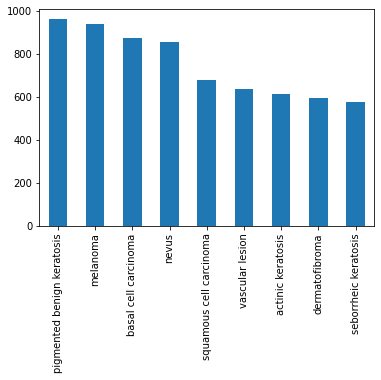

In [98]:
df_train_new['Label'].value_counts().plot.bar()

In [99]:
batch_size = 32
img_height = 180
img_width = 180

In [100]:
data_dir_train="/content/gdrive/My Drive/AI ML/DL CNN/Melanoma Detection Assignment/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [101]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [107]:
model_2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [108]:
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [109]:
# View the summary of all layers
model_2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 90, 90, 32)        4640      
                                                     

In [110]:
epochs = 25
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
169/169 [==============================] - 33s 180ms/step - loss: 2.3118 - accuracy: 0.1478 - val_loss: 2.1182 - val_accuracy: 0.1641
Epoch 2/25
169/169 [==============================] - 31s 180ms/step - loss: 1.8041 - accuracy: 0.2958 - val_loss: 1.7384 - val_accuracy: 0.3415
Epoch 3/25
169/169 [==============================] - 31s 179ms/step - loss: 1.6332 - accuracy: 0.3711 - val_loss: 1.5800 - val_accuracy: 0.4298
Epoch 4/25
169/169 [==============================] - 31s 179ms/step - loss: 1.5105 - accuracy: 0.4171 - val_loss: 1.5566 - val_accuracy: 0.4165
Epoch 5/25
169/169 [==============================] - 31s 178ms/step - loss: 1.4659 - accuracy: 0.4388 - val_loss: 1.5390 - val_accuracy: 0.4091
Epoch 6/25
169/169 [==============================] - 31s 181ms/step - loss: 1.4206 - accuracy: 0.4494 - val_loss: 1.4922 - val_accuracy: 0.4410
Epoch 7/25
169/169 [==============================] - 32s 181ms/step - loss: 1.3918 - accuracy: 0.4651 - val_loss: 1.4921 - val_ac

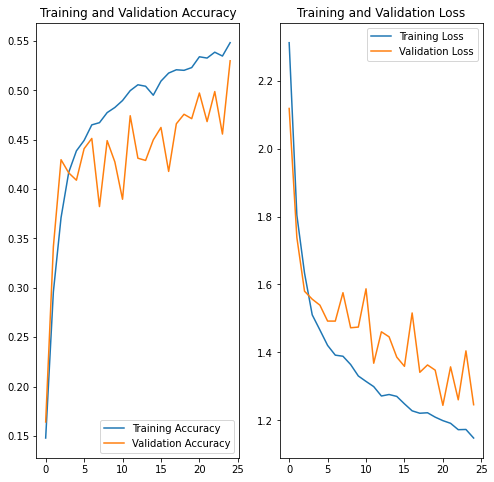

In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

* If we checked the accuracy using model_2, it is very less but difference in validatio and training accuracucy is also less which is good.
* Lets try removing augumentation layer from model

In [112]:
# Lets try without augumentation strategy
model_3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [113]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [114]:
# View the summary of all layers
model_3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [115]:
epochs = 25
history = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
169/169 [==============================] - 44s 250ms/step - loss: 2.3846 - accuracy: 0.1567 - val_loss: 1.9776 - val_accuracy: 0.1930
Epoch 2/25
169/169 [==============================] - 33s 188ms/step - loss: 1.8759 - accuracy: 0.2897 - val_loss: 1.6928 - val_accuracy: 0.3549
Epoch 3/25
169/169 [==============================] - 31s 176ms/step - loss: 1.5834 - accuracy: 0.4125 - val_loss: 1.5254 - val_accuracy: 0.4529
Epoch 4/25
169/169 [==============================] - 31s 177ms/step - loss: 1.4077 - accuracy: 0.4596 - val_loss: 1.4775 - val_accuracy: 0.4343
Epoch 5/25
169/169 [==============================] - 31s 179ms/step - loss: 1.3189 - accuracy: 0.5050 - val_loss: 1.4061 - val_accuracy: 0.4937
Epoch 6/25
169/169 [==============================] - 31s 176ms/step - loss: 1.2030 - accuracy: 0.5510 - val_loss: 1.2871 - val_accuracy: 0.5286
Epoch 7/25
169/169 [==============================] - 31s 180ms/step - loss: 1.1138 - accuracy: 0.5770 - val_loss: 1.1790 - val_ac

* Removal of augumentation layer considerably improved the accuracy of model

* Test model against test dataset

In [116]:
# Check test dataset
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
path_list_new = [x for x in glob(os.path.join(data_dir_test, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_test, '*', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
len(dataframe_dict_new)

118

In [117]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [118]:
# Load test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 118 files belonging to 9 classes.


In [119]:
# Evaluate test dataset
scores = model_3.evaluate(test_ds)

4/4 [==============================] - 47s 62ms/step - loss: 6.0131 - accuracy: 0.4068
